<a href="https://colab.research.google.com/github/Govindroy/CODSOFT_t1/blob/main/Heartdeases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heartDisease.csv to heartDisease.csv


In [ ]:
df = pd.read_csv("heartDisease.csv")


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
df.drop(["education"], axis=1, inplace=True)

In [ ]:
df.shape

(4238, 15)

In [ ]:
df['male'].value_counts()

0    2419
1    1819
Name: male, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

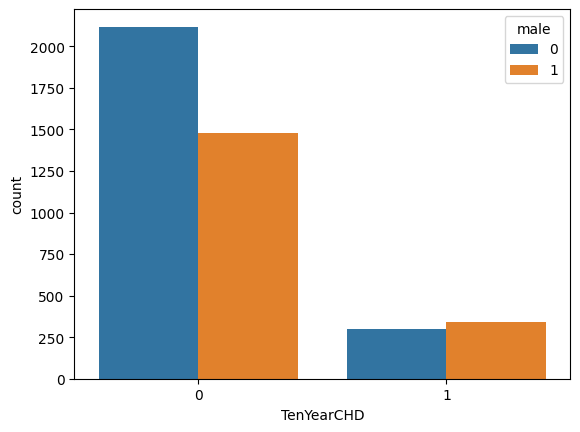

In [ ]:
sns.countplot(x='TenYearCHD',data=df,hue='male')

In [ ]:
df[['prevalentStroke','TenYearCHD']].groupby('prevalentStroke', as_index=False).mean()

,prevalentStroke,TenYearCHD
0,0,0.150249
1,1,0.440000


<Axes: xlabel='TenYearCHD', ylabel='count'>

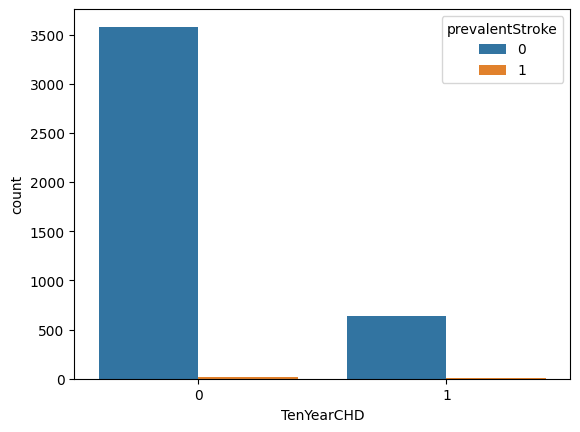

In [ ]:
sns.countplot(x='TenYearCHD',data=df,hue='prevalentStroke')

<Axes: ylabel='age'>

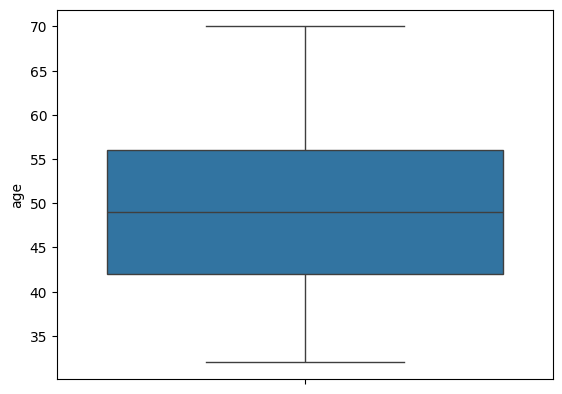

In [ ]:
sns.boxplot(df['age'],orient='vertical')

In [ ]:
df['AgeBand'] = pd.cut(df['age'],3) ## Need to save in another column to discover the ageband, then we can replace in the age feature

In [ ]:
df[['AgeBand','TenYearCHD']].groupby('AgeBand', as_index=False).mean()

,AgeBand,TenYearCHD
0,"(31.962, 44.667]",0.064561
1,"(44.667, 57.333]",0.158983
2,"(57.333, 70.0]",0.272138


In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,AgeBand
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,"(31.962, 44.667]"
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,"(44.667, 57.333]"
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,"(44.667, 57.333]"
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,"(57.333, 70.0]"
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,"(44.667, 57.333]"


In [ ]:
df.loc[(df['age'] >= 30) & (df['age'] < 45), 'age'] = 0
df.loc[(df['age'] >= 45) & (df['age'] < 58), 'age'] = 1
df.loc[(df['age'] >=58), 'age'] = 2

In [ ]:
df['age'].head(5)

0    0
1    1
2    1
3    2
4    1
Name: age, dtype: int64

In [ ]:
df.drop(labels='AgeBand', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df['cigsPerDay'].describe()


count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

In [ ]:
df['cigsPerDay'].unique()


array([ 0.        , 20.        , 30.        , 23.        , 15.        ,
        9.        , 10.        ,  5.        , 35.        , 43.        ,
        1.        , 40.        ,  3.        ,  2.        ,  9.00308862,
       12.        ,  4.        , 18.        , 25.        , 60.        ,
       14.        , 45.        ,  8.        , 50.        , 13.        ,
       11.        ,  7.        ,  6.        , 38.        , 29.        ,
       17.        , 16.        , 19.        , 70.        ])

In [ ]:
df.head(5)


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,1,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,2,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [ ]:
df['totChol'].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
df['totChol'].fillna(value=df['totChol'].mean(), axis=0, inplace=True) ## let's fill with the mean

In [ ]:
df['BMI'].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [ ]:
df['BMI'].fillna(value=df['BMI'].mean(), axis=0, inplace=True) ## let's fill with the mean

In [ ]:
df['heartRate'].fillna(value=df['heartRate'].mean(), axis=0, inplace=True) ## let's fill with the mean

In [ ]:
df['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
df['glucose'].fillna(value=df['glucose'].mean(), axis=0, inplace=True) ## let's fill with the mean

In [ ]:
df['male'].value_counts()

0    2419
1    1819
Name: male, dtype: int64

In [ ]:
df.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.032944,0.197596,0.316807,-0.052506,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.032944,1.000000,-0.195369,-0.179911,0.109320,0.054230,0.289806,0.096951,0.242634,0.372425,0.194152,0.115295,-0.007619,0.110631,0.210772
currentSmoker,0.197596,-0.195369,1.000000,0.766970,-0.048938,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.179911,0.766970,1.000000,-0.046128,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052506,0.109320,-0.048938,-0.046128,1.000000,0.117365,0.261187,0.052047,0.079595,0.254219,0.194227,0.100266,0.015233,0.049059,0.087489
prevalentStroke,-0.004546,0.054230,-0.032988,-0.032706,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.289806,-0.103260,-0.065947,0.261187,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.096951,-0.044295,-0.037063,0.052047,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.242634,-0.046285,-0.026025,0.079595,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.372425,-0.130230,-0.088505,0.254219,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


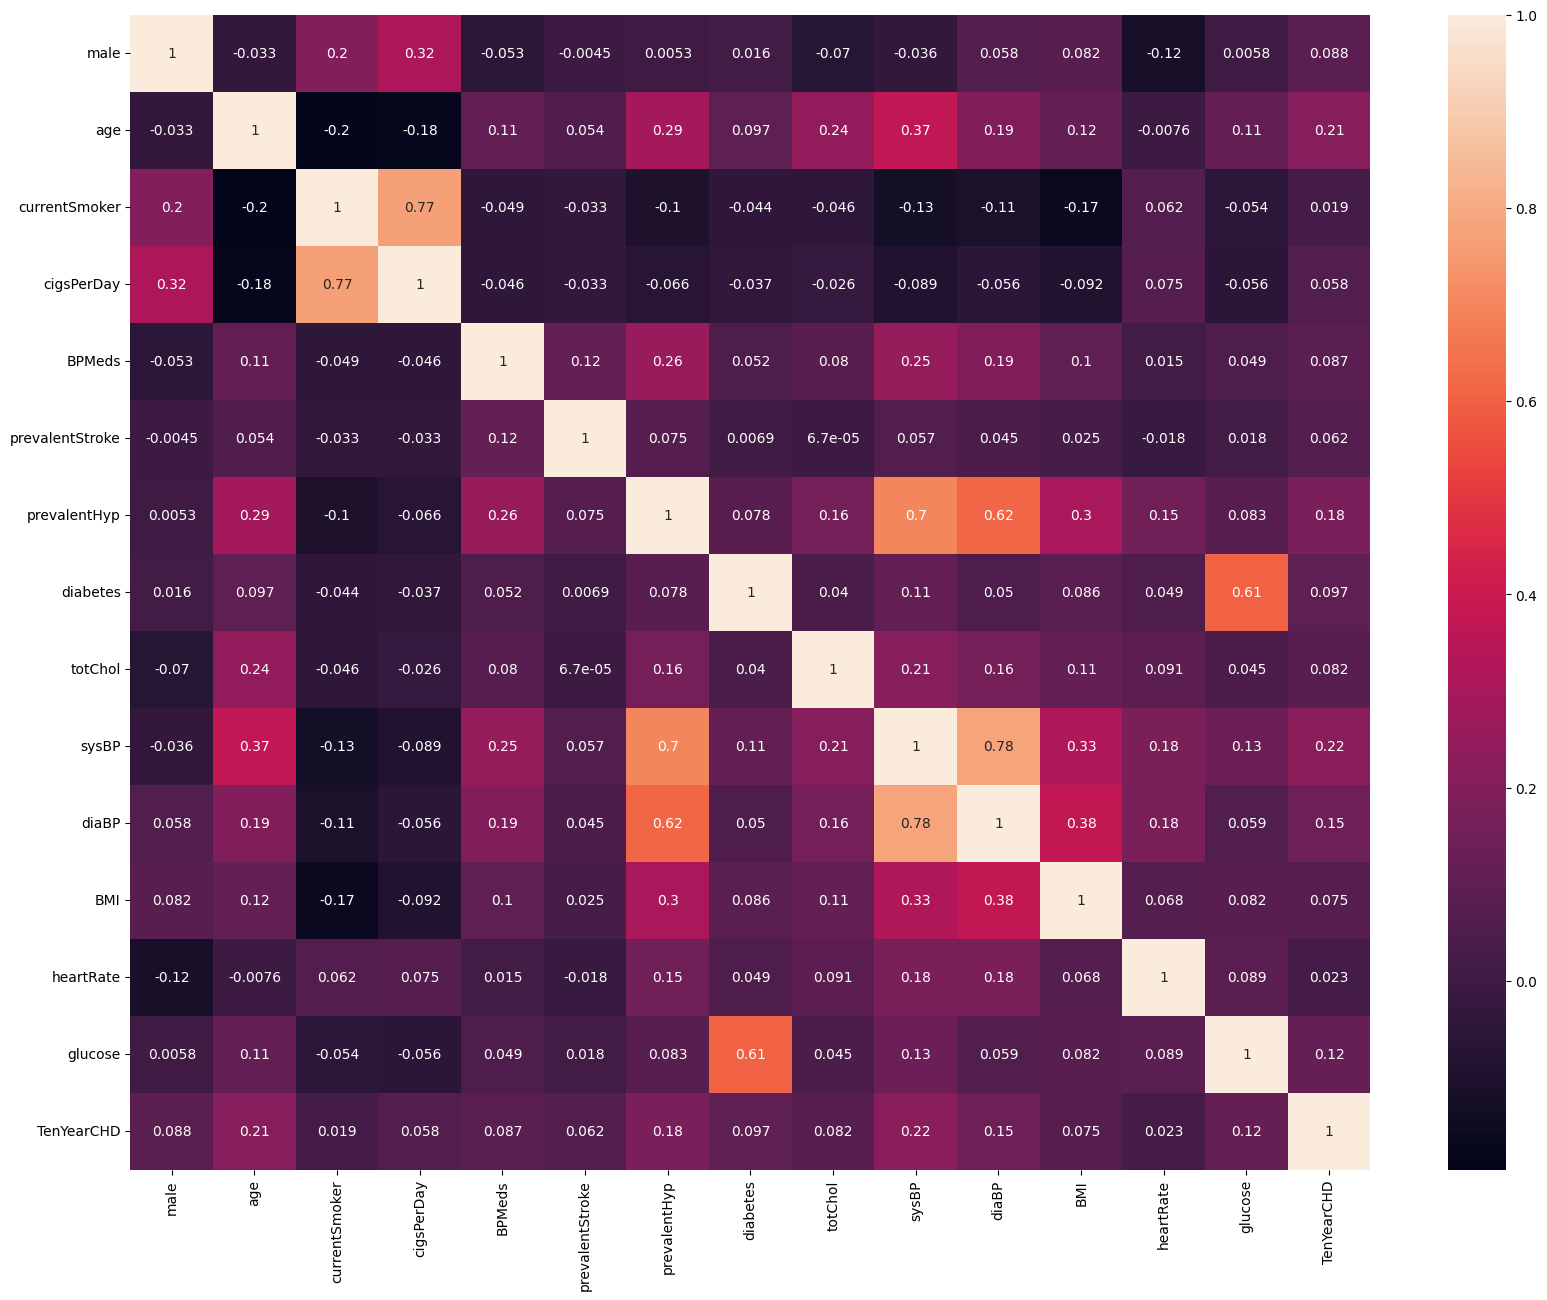

In [ ]:
fig,corr=plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
column_sels=['age','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']
x=df.loc[:,column_sels]
y=df['TenYearCHD']
x=pd.DataFrame(x,columns=column_sels)



In [ ]:
print(x)

      age  totChol  sysBP  diaBP    BMI  heartRate     glucose  cigsPerDay
0       0    195.0  106.0   70.0  26.97       80.0   77.000000         0.0
1       1    250.0  121.0   81.0  28.73       95.0   76.000000         0.0
2       1    245.0  127.5   80.0  25.34       75.0   70.000000        20.0
3       2    225.0  150.0   95.0  28.58       65.0  103.000000        30.0
4       1    285.0  130.0   84.0  23.10       85.0   85.000000        23.0
...   ...      ...    ...    ...    ...        ...         ...         ...
4233    1    313.0  179.0   92.0  25.97       66.0   86.000000         1.0
4234    1    207.0  126.5   80.0  19.71       65.0   68.000000        43.0
4235    1    248.0  131.0   72.0  22.00       84.0   86.000000        20.0
4236    0    210.0  126.5   87.0  19.16       86.0   81.966753        15.0
4237    1    269.0  133.5   83.0  21.47       80.0  107.000000         0.0

[4238 rows x 8 columns]


In [ ]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train=pd.DataFrame(x_train)

In [ ]:
x_test=pd.DataFrame(x_test)

In [ ]:
x_train

,0,1,2,3,4,5,6,7
0,1.521252,0.065262,0.634003,0.104084,1.142695,-0.074013,1.665644,0.077349
1,0.163778,-0.323425,0.039328,-0.063897,-1.130659,-0.816362,-0.221900,1.757177
2,-1.193697,0.956954,-0.372370,0.356054,0.213797,0.008470,-0.309693,0.917263
3,0.163778,1.437095,-0.052161,0.440045,0.255353,-0.486429,-0.397486,-0.762565
4,-1.193697,-0.574927,-1.012789,-1.071780,-0.690655,0.750819,0.129271,-0.762565
...,...,...,...,...,...,...,...,...
3385,-1.193697,-1.146525,-0.463858,0.020093,1.123139,0.750819,-0.309693,-0.762565
3386,0.163778,0.545403,-0.235137,-0.147887,-1.360439,-0.074013,0.612131,-0.594582
3387,-1.193697,-2.038217,-1.424487,-1.743702,-0.326430,-0.486429,-0.046315,0.917263
3388,0.163778,3.311935,0.039328,-0.483848,-0.375319,-0.074013,-0.046315,-0.762565


In [ ]:
x_test

,0,1,2,3,4,5,6,7
0,0.163778,1.551415,-0.189393,0.818001,0.448466,-0.074013,-0.880346,-0.762565
1,1.521252,-0.963614,0.954212,-0.189882,-0.597765,-1.311261,-0.397486,-0.762565
2,1.521252,2.031557,3.104190,1.783889,3.093378,-1.558711,-0.178004,-0.678573
3,0.163778,-0.506336,0.931340,-0.063897,0.028018,1.988068,-0.309693,-0.762565
4,0.163778,1.139865,0.176560,0.776006,0.106241,-0.898845,-0.485279,-0.762565
...,...,...,...,...,...,...,...,...
843,0.163778,0.362492,0.679747,0.188074,1.176917,1.988068,-0.309693,1.757177
844,1.521252,-0.026194,1.045700,-0.063897,3.266935,0.173437,-0.134107,-0.762565
845,0.163778,-0.620655,-0.486731,-0.399858,0.118463,0.998269,-0.221900,1.757177
846,0.163778,-0.483472,0.245177,0.188074,-0.382652,0.585853,1.007199,2.849065


In [ ]:
log=LogisticRegression()



In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
accuracy_score(y_pred,y_test)

0.8384433962264151

In [ ]:
log.score(x_train,y_train)

0.8542772861356932

In [ ]:
confusion_matrix(y_pred,y_test)

array([[705, 132],
       [  5,   6]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       837
           1       0.04      0.55      0.08        11

    accuracy                           0.84       848
   macro avg       0.52      0.69      0.50       848
weighted avg       0.98      0.84      0.90       848



In [ ]:
nvclassifier = GaussianNB()

In [ ]:
nvclassifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 

In [ ]:
accuracy_score(y_pred,y_test)

0.8313679245283019

In [ ]:
nvclassifier.score(x_train,y_train)

0.8289085545722714

In [ ]:
confusion_matrix(y_pred,y_test)

array([[671, 104],
       [ 39,  34]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90       775
           1       0.25      0.47      0.32        73

    accuracy                           0.83       848
   macro avg       0.60      0.67      0.61       848
weighted avg       0.88      0.83      0.85       848



In [ ]:
clf=svm.SVC(kernel="poly")
clf.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
clf.score(x_train,y_train)

0.8584070796460177

In [ ]:
accuracy_score(y_pred,y_test)

0.8372641509433962

In [ ]:
confusion_matrix(y_pred,y_test)

array([[707, 135],
       [  3,   3]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       842
           1       0.02      0.50      0.04         6

    accuracy                           0.84       848
   macro avg       0.51      0.67      0.48       848
weighted avg       0.99      0.84      0.90       848



In [ ]:
import numpy as np

# Assuming that you have already loaded the dataset and trained the logistic regression model

# Preprocess the input data
#input_data = [38,195,122,84,23,75,78,5]
input_data = [62,140,268,160,500,3.6,2,2]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



# Make the prediction
prediction = clf.predict(input_data_reshaped)

# Print the predicted value
print(prediction[0])

# Print the corresponding class label
if prediction[0] == 1:
    print("The Person does not have a Heart disease")
else:
    print("The person has Heart disease")

1
The Person does not have a Heart disease


In [ ]:
#With LOGISTIC REGRESSION, we are getting an accuracy of 85.84 % which is better than all three but as our dataset is not balanced precision and recall for 1 is very low. Since GAUSSIAN NAÏVE BAYES is able to predict 1 better than the other algorithms we have used this model and the accuracy score is also satisfactory.

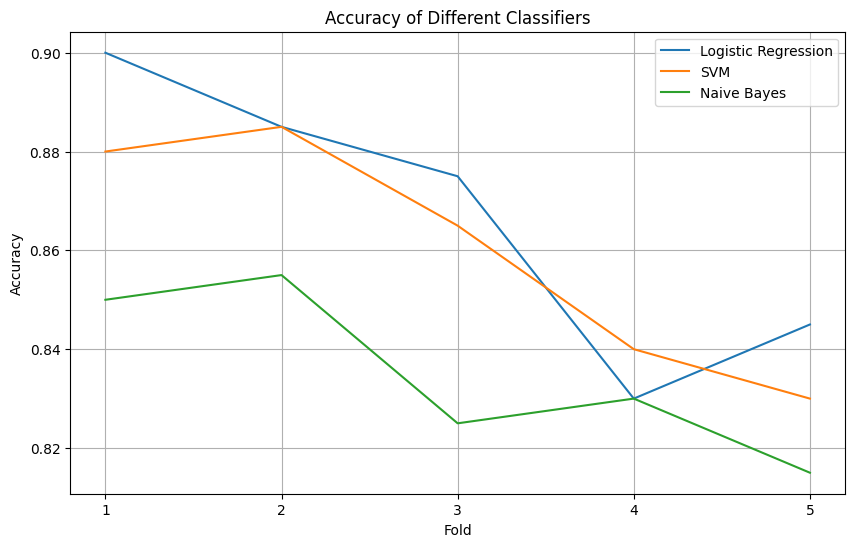

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

# Generate synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Initialize lists to store accuracy scores
accuracy_scores = {clf_name: [] for clf_name in classifiers}

# Perform cross-validation and store accuracy scores
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
    accuracy_scores[clf_name] = scores

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
for clf_name, scores in accuracy_scores.items():
    plt.plot(np.arange(1, 6), scores, label=clf_name)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, 6))
plt.show()


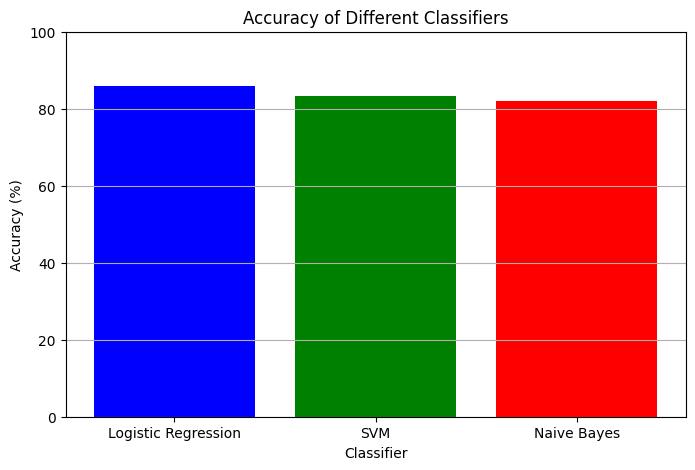

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define accuracy scores
accuracy_scores = {
    'Logistic Regression': 85.84,
    'SVM': 83.33,
    'Naive Bayes': 82.0
}

# Plotting the accuracy graph
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()
